Возрастное распределение клиентов (гистограмма)

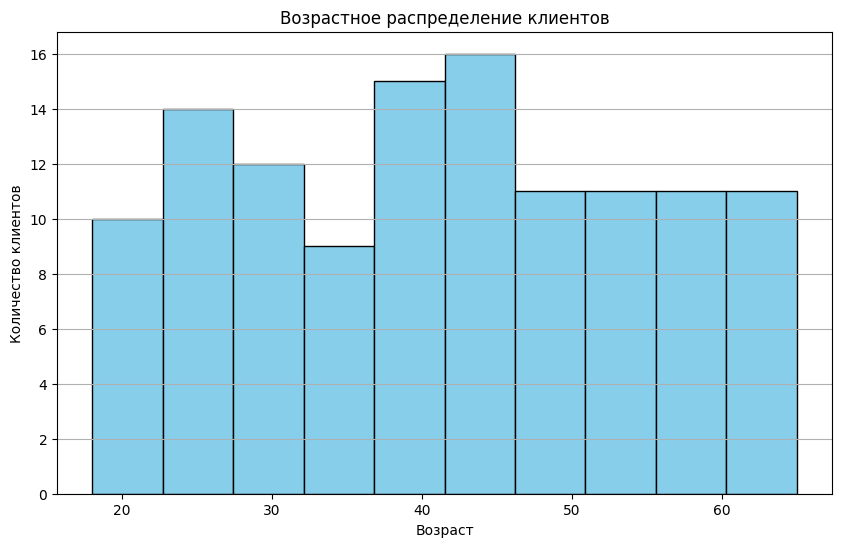

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
customers = pd.read_csv('/content/Customers.csv')
customers['Age'] = pd.to_datetime('today').year - pd.to_datetime(customers['DateOfBirth']).dt.year

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(customers['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Возрастное распределение клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.grid(axis='y')
plt.show()


Распределение кредитов по продуктам (круговая диаграмма)

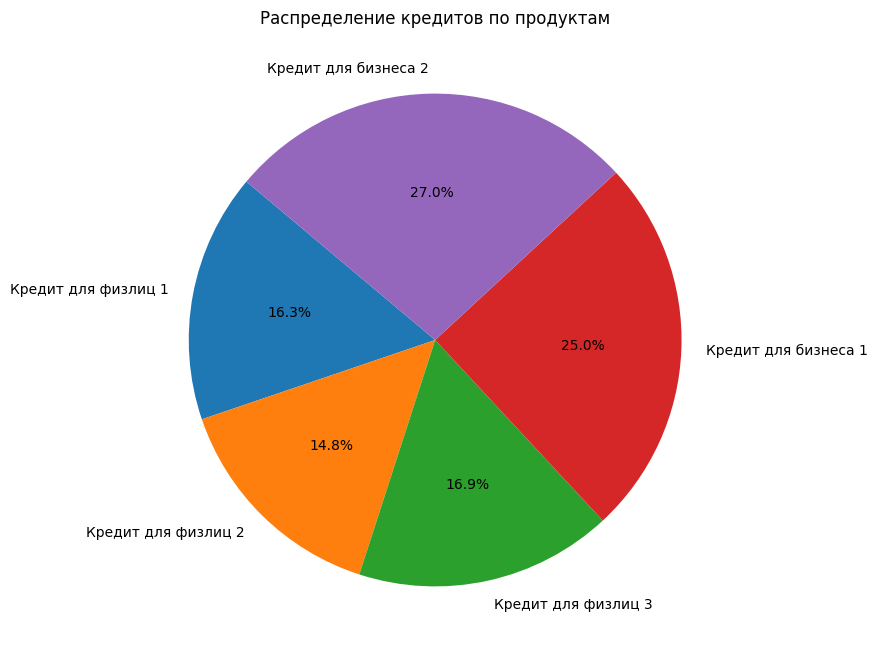

In [ ]:
credit_agreements = pd.read_csv('/content/CreditAgreements.csv')
credit_products = pd.read_csv('/content/CreditProducts.csv')

# Объединение данных
credit_summary = credit_agreements.groupby('CreditProductID').size().reset_index(name='Count')
credit_summary = credit_summary.merge(credit_products, left_on='CreditProductID', right_on='CreditProductID')

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(credit_summary['Count'], labels=credit_summary['ProductName'], autopct='%1.1f%%', startangle=140)
plt.title('Распределение кредитов по продуктам')
plt.show()


Динамика транзакций по времени (линейный график)

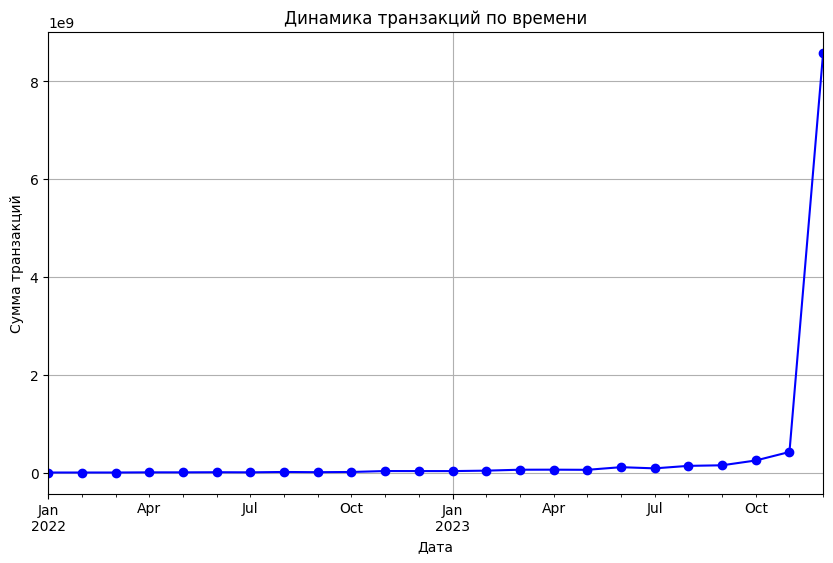

In [ ]:
credit_transactions = pd.read_csv('/content/CreditTransactions.csv')
credit_transactions['TransactionDate'] = pd.to_datetime(credit_transactions['TransactionDate'])

# Группировка данных по дате
transactions_summary = credit_transactions.groupby(credit_transactions['TransactionDate'].dt.to_period('M'))['TransactionAmount'].sum()

# Построение линейного графика
transactions_summary.plot(kind='line', figsize=(10, 6), marker='o', color='blue')
plt.title('Динамика транзакций по времени')
plt.xlabel('Дата')
plt.ylabel('Сумма транзакций')
plt.grid()
plt.show()


A. Общая аналитика клиентов
    Ключевые метрики:
        Количество клиентов по полу.
        Возрастное распределение клиентов.
        Распределение клиентов по дате регистрации.
    Графики:
        Гистограммы (пол, возраст).
        Линейные графики (регистрация клиентов во времени).

B. Аналитика кредитных продуктов
    Ключевые метрики:
        Количество выданных кредитов по продуктам.
        Средняя процентная ставка по продуктам.
        Общий объем выданных кредитов.
    Графики:
        Круговая диаграмма (доли продуктов).
        Столбчатая диаграмма (выдача кредитов по продуктам).

C. Анализ транзакций
    Ключевые метрики:
        Сумма и количество транзакций по типу (внесение, снятие, проценты).
        Средний объем транзакций.
        Динамика транзакций по времени.
    Графики:
        Линейные графики (динамика транзакций).
        Тепловые карты (распределение транзакций по дням).

<ipython-input-6-59d6daaa7ca3>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x='client_id', y='transaction_amount', palette='viridis')


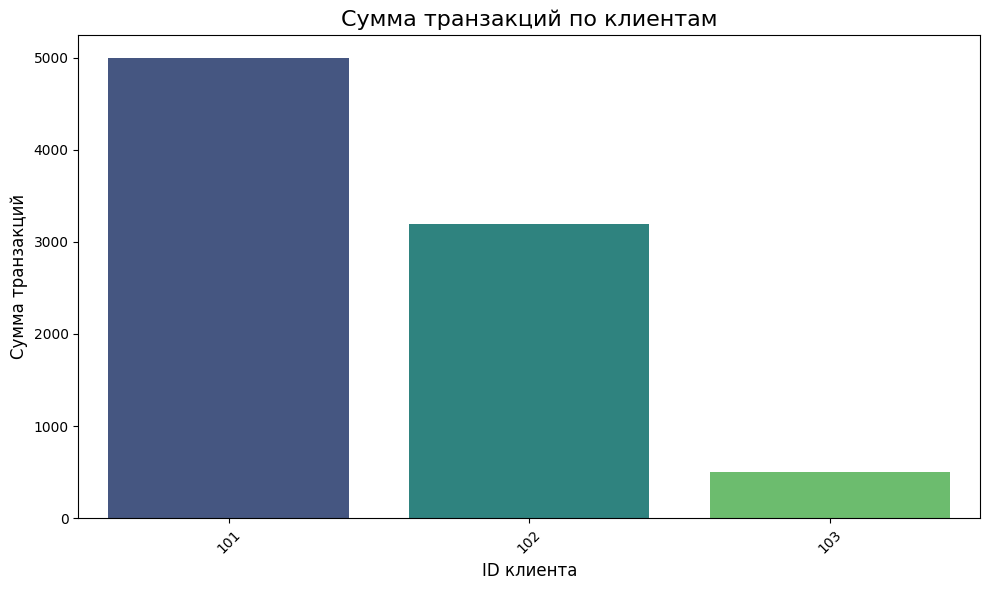

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Пример данных (можно заменить загрузкой из базы данных)
data = {
    'client_id': [101, 102, 101, 103, 102, 101],
    'transaction_amount': [1000, 2000, 1500, 500, 1200, 2500]
}

# Создаем DataFrame
df = pd.DataFrame(data)

# Группируем данные по клиентам и суммируем транзакции
result = df.groupby('client_id')['transaction_amount'].sum().reset_index()
result = result.sort_values(by='transaction_amount', ascending=False)

# Построение дашборда
plt.figure(figsize=(10, 6))
sns.barplot(data=result, x='client_id', y='transaction_amount', palette='viridis')

# Настройка графика
plt.title('Сумма транзакций по клиентам', fontsize=16)
plt.xlabel('ID клиента', fontsize=12)
plt.ylabel('Сумма транзакций', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Показать график
plt.show()
